# Olá pessoa, tudo bem?

Hoje vou importar uma ação qualquer, salvar o arquivo como csv e logo<br>
em seguida fazer plot do gráfico de candlestick que é o gráfico mais<br>
usado para fazer leitura pelos analistas técnicos.

- Vamos fazer o importação das bibliotecas

In [1]:
import pandas as pd
import datetime as dt
import matplotlib as plt
import pandas_datareader.data as web
from matplotlib import style
import mplfinance as mpf
import yfinance as yf

### Importando as cotações do yahoo finance

In [2]:
df = yf.download("PETR4.SA", start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


### Salvando as cotações da PETR4 em um arquivo csv

In [3]:
df.to_csv("Petr4_2022.csv")

### Lendo as primeiras 20 cotações do arquivo csv

In [4]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,30.510000,30.700001,30.309999,30.700001,14.581380,37774500
2020-01-03,30.879999,31.240000,30.450001,30.450001,14.462640,71595600
2020-01-06,30.430000,30.940001,29.950001,30.809999,14.633624,81844000
2020-01-07,30.820000,30.879999,30.469999,30.690001,14.576631,32822000
2020-01-08,30.690001,30.770000,30.240000,30.500000,14.486386,48215600
2020-01-09,30.469999,30.620001,30.250000,30.400000,14.438889,36102700
2020-01-10,30.389999,30.440001,30.129999,30.270000,14.377145,25397500
2020-01-13,30.350000,30.430000,30.209999,30.330000,14.405642,30676800
2020-01-14,30.230000,30.270000,29.770000,30.000000,14.248905,39796500


### Agora vamos fazer o esboço do gráfico

/home/quant/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/home/quant/.local/lib/python3.10/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


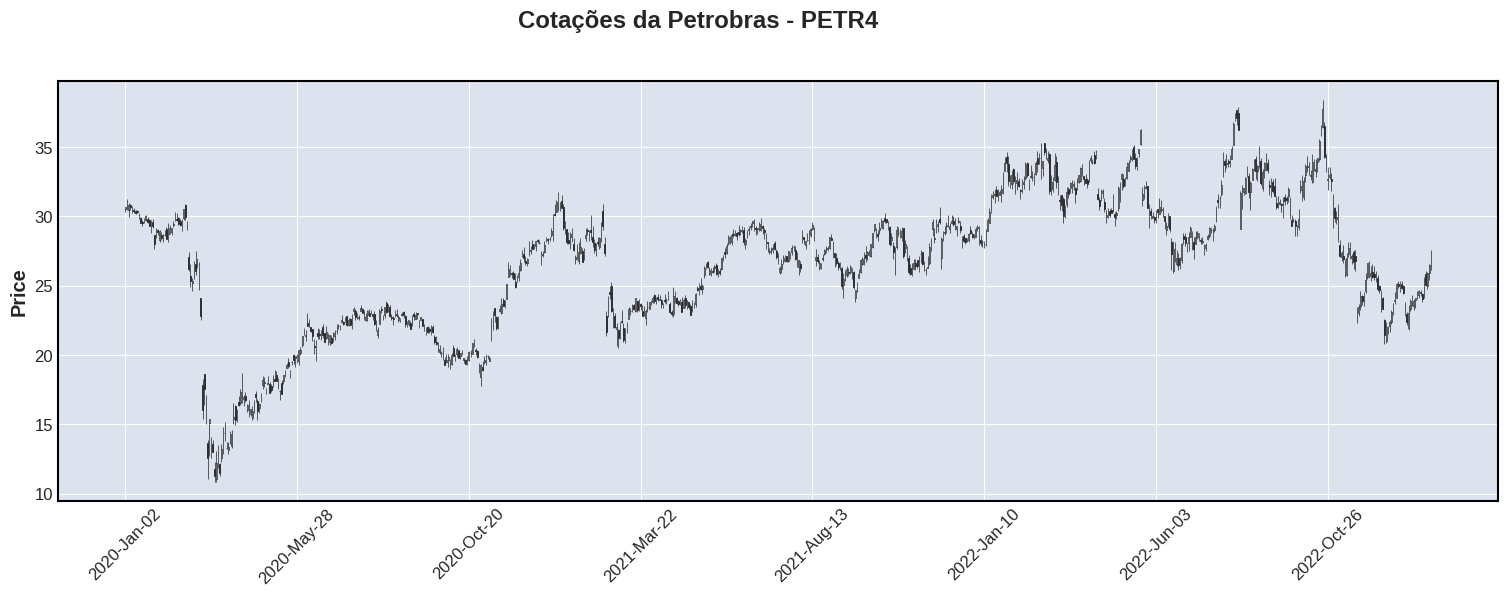

In [5]:
df = pd.read_csv("Petr4_2022.csv", parse_dates=True, index_col = 0)
mpf.plot(df, type="candle",title="Cotações da Petrobras - PETR4", figsize=(20, 6))
media = df["Adj Close"].rolling(20).mean()



In [6]:

df["BAND SUP"] = df["Adj Close"].rolling(20).std() * 2 + df["Adj Close"].rolling(20).mean()
df["BAND INF"] = - df["Adj Close"].rolling(20).std() * 2 + df["Adj Close"].rolling(20).mean()
df["MED20"] = df["Adj Close"].rolling(20).mean()
df.dropna(0, inplace=True)
df

/tmp/ipykernel_34839/2369457702.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0, inplace=True)


,Open,High,Low,Close,Adj Close,Volume,BAND SUP,BAND INF,MED20
Date,,,,,,,,,
2020-01-29,29.000000,29.080000,28.670000,28.850000,13.702695,42297500,14.864463,13.472334,14.168399
2020-01-30,28.280001,29.040001,28.180000,28.940001,13.745445,44266800,14.818632,13.434572,14.126602
2020-01-31,28.629999,28.840000,28.309999,28.450001,13.512711,55446700,14.803656,13.354555,14.079106
2020-02-03,28.520000,28.730000,28.160000,28.180000,13.384470,39452800,14.755157,13.278139,14.016648
2020-02-04,28.650000,29.040001,28.559999,28.629999,13.598207,57658400,14.679178,13.256275,13.967727
...,...,...,...,...,...,...,...,...,...
2023-01-17,24.110001,25.620001,24.110001,25.520000,25.520000,91797500,25.765209,22.437791,24.101500
2023-01-18,25.840000,26.030001,25.000000,25.070000,25.070000,69692900,25.844454,22.558546,24.201500
2023-01-19,25.000000,25.950001,24.790001,25.889999,25.889999,75553300,26.094830,22.540170,24.317500


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,BAND SUP,BAND INF,MED20
Date,,,,,,,,,
2020-01-29,29.000000,29.080000,28.670000,28.850000,13.702695,42297500,14.864463,13.472334,14.168399
2020-01-30,28.280001,29.040001,28.180000,28.940001,13.745445,44266800,14.818632,13.434572,14.126602
2020-01-31,28.629999,28.840000,28.309999,28.450001,13.512711,55446700,14.803656,13.354555,14.079106
2020-02-03,28.520000,28.730000,28.160000,28.180000,13.384470,39452800,14.755157,13.278139,14.016648
2020-02-04,28.650000,29.040001,28.559999,28.629999,13.598207,57658400,14.679178,13.256275,13.967727


In [19]:
valores = df["Adj Close"].rolling(20).mean()
valores.dropna(0, inplace=True)
valores

KeyError: 'Adj Close'

In [11]:

candlestick = dict(type='candle',mav=(20), volume=True,figratio=(30,10),figscale=0.75)
color_candles = mpf.make_marketcolors(up='green',down='r',volume='blue')
df  = mpf.make_mpf_style(marketcolors=color_candles)

mpf.plot(valores)


mpf.plot(df, **candlestick, style=estilo)


TypeError: Expect data as DataFrame

In [ ]:
valores

In [24]:
df_petro = yf.download("PETR4.SA", start="2020-01-01")
df_ibov = yf.download("^BVSP", start="2020-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
fator_normalizado_petro = df_petro["Adj Close"].mean()
fator_normalizador_ibov = df_ibov["Adj Close"].mean()
print("{:.2f}".format(fator_normalizado_petro))
print("{:.2f}".format(fator_normalizador_ibov))
coluna_petr = df_petro["Adj Close"]
pd.DataFrame(coluna_petr)

coluna_ibov = df_ibov["Adj Close"]



15.78
108417.37


<AxesSubplot: xlabel='Date'>

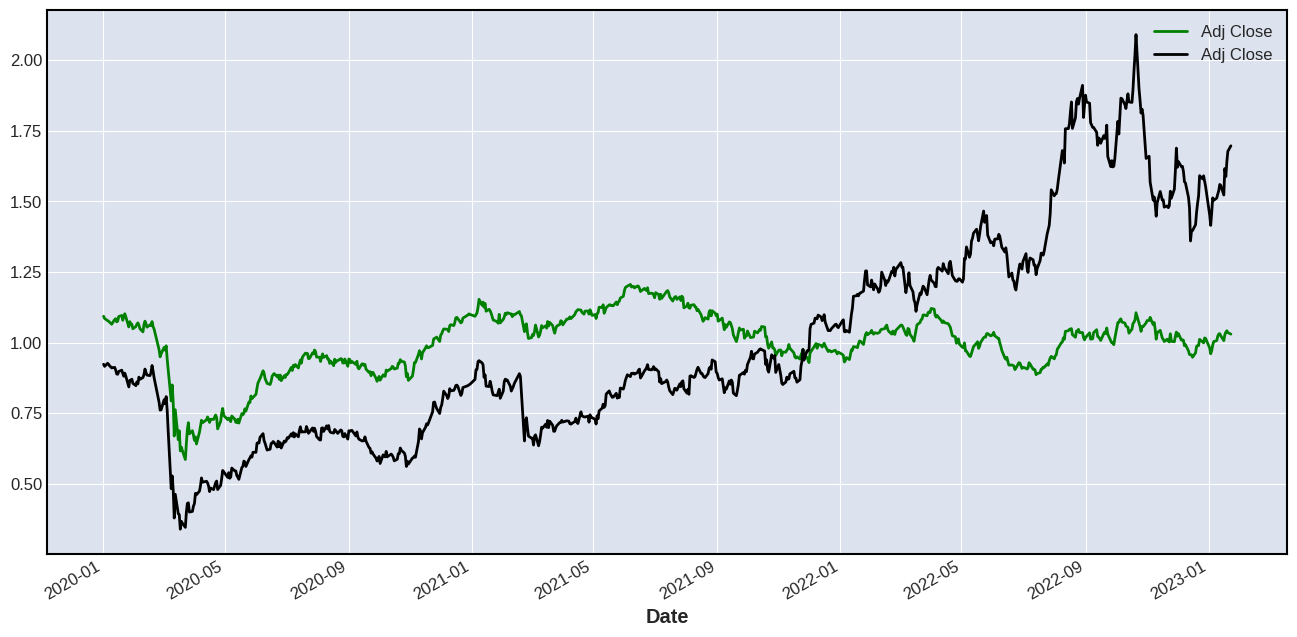

In [30]:
normaliza_petr = coluna_petr / fator_normalizado_petro
normaliza_ibov = coluna_ibov / fator_normalizador_ibov


normaliza_ibov.plot(color="g", figsize=(16,8), legend="ibov")
normaliza_petr.plot(color="black", legend="PETR4")